In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Zamiana wartości null na mediany oraz płci na wartości binarne

In [ ]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})


<ipython-input-91-79bbf12b86ff>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})
<ipython-input-91-79bbf12b86ff>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})


<ipython-input-92-4fb2d7629176>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = df_train.groupby('AgeGroup')['Survived'].mean()


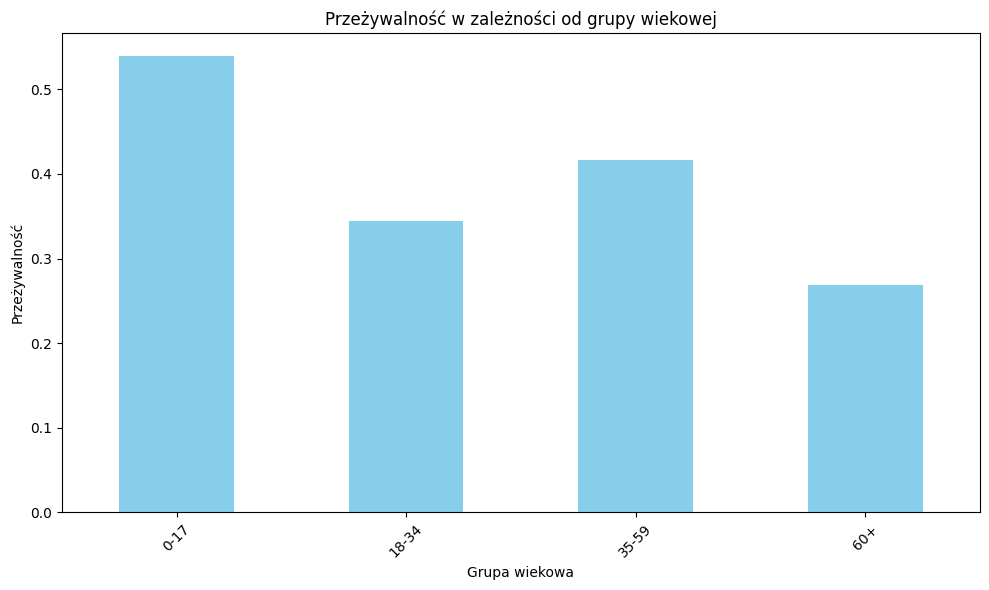

In [ ]:
bins = [0, 18, 35, 60, 100]
labels = ['0-17', '18-34', '35-59', '60+']

for df in [df_test, df_train]:
  # Dodaj kolumnę AgeGroup do DataFrame
  df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Oblicz przeżywalność dla każdej grupy wiekowej
survival_by_agegroup = df_train.groupby('AgeGroup')['Survived'].mean()

# Stwórz wykres
plt.figure(figsize=(10, 6))
survival_by_agegroup.plot(kind='bar', color='skyblue')

# Ustawienia wykresu
plt.title('Przeżywalność w zależności od grupy wiekowej')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Przeżywalność')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
df_train = pd.get_dummies(df_train, columns=['AgeGroup'])
df_test = pd.get_dummies(df_test, columns=['AgeGroup'])

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup_0-17,AgeGroup_18-34,AgeGroup_35-59,AgeGroup_60+
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


Tworzenie nowych feature'ow

In [ ]:
for df in [df_train, df_test]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Tytuł z nazwiska
for df in [df_train, df_test]:
   df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
   df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
   df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
   df['Title'] = df['Title'].replace(
       ['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir', 'Countess', 'Dona', 'Lady'], 'Rare'
   )

df_train = pd.get_dummies(df_train, columns=['Title'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Title'], drop_first=True)


df_train = df_train.astype({col: 'int' for col in df_train.select_dtypes('bool').columns})
df_test = df_test.astype({col: 'int' for col in df_test.select_dtypes('bool').columns})



In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,AgeGroup_0-17,AgeGroup_18-34,AgeGroup_35-59,AgeGroup_60+,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,2,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,1,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,0,1,0,2,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,1,0,1,1,0,1,0,0


In [ ]:
df_numeric = df_train.select_dtypes(include='number')
df_numeric_test = df_test.select_dtypes(include='number')

In [ ]:
df_numeric

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup_0-17,AgeGroup_18-34,AgeGroup_35-59,AgeGroup_60+,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0,22.0,1,0,7.2500,0,1,0,0,2,0,0,1,0,0
1,2,1,1,1,38.0,1,0,71.2833,0,0,1,0,2,0,0,0,1,0
2,3,1,3,1,26.0,0,0,7.9250,0,1,0,0,1,1,1,0,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,0,1,0,2,0,0,0,1,0
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,1,0,0,1,1,0,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,1,0,0,1,1,1,0,0,0
888,889,0,3,1,28.0,1,2,23.4500,0,1,0,0,4,0,1,0,0,0
889,890,1,1,0,26.0,0,0,30.0000,0,1,0,0,1,1,0,1,0,0


In [ ]:
df_numeric.groupby('Pclass').size()

,0
Pclass,
1,216
2,184
3,491


<Axes: title={'center': 'Procent osób uratowanych w poszczególnych z klas'}, xlabel='Pclass'>

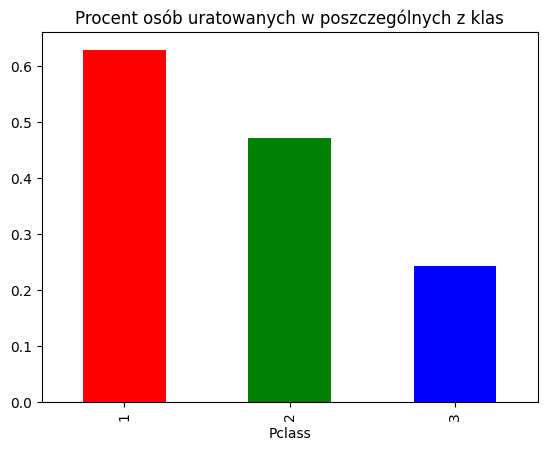

In [ ]:
survival_by_class = df_numeric.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar', color=['red', 'green', 'blue'], title="Procent osób uratowanych w poszczególnych z klas")

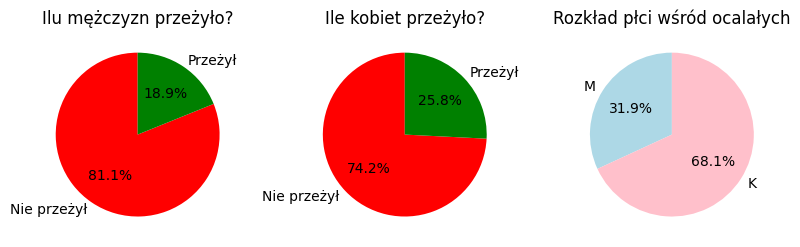

In [ ]:
df_men = df_numeric.loc[df_numeric['Sex'] == 0]
df_women = df_numeric.loc[df_numeric['Sex'] == 1]
df_unknown = df_numeric.loc[df_numeric['Sex'] == "null"]

survival_counts_men = df_men['Survived'].value_counts()
survival_counts_women = df_women['Survived'].value_counts()

total_survived = len(df_numeric.loc[df_numeric['Survived'] == 1])

percentage_men = (survival_counts_men[1] / total_survived) * 100
percentage_women = (survival_counts_women[1] / total_survived) * 100
sizes = [percentage_men, percentage_women]
fig, axes = plt.subplots(1, 3, figsize=(8, 12))

# Pierwszy wykres - mężczyźni
axes[0].pie(survival_counts_men, labels=['Nie przeżył', 'Przeżył'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axes[0].set_title('Ilu mężczyzn przeżyło?')

# Drugi wykres - kobiety
axes[1].pie(survival_counts_women, labels=['Nie przeżył', 'Przeżył'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axes[1].set_title('Ile kobiet przeżyło?')

axes[2].pie(sizes, labels=['M', 'K'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
axes[2].set_title('Rozkład płci wśród ocalałych')
plt.tight_layout()

### liczba osób, które przeżyły w danej z klas

In [ ]:
df_numeric.loc[df_numeric['Survived'] == 1].groupby('Pclass').size()

,0
Pclass,
1,136
2,87
3,119


In [ ]:
correlation_matrix = df_numeric.corr()

correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup_0-17,AgeGroup_18-34,AgeGroup_35-59,AgeGroup_60+,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.024874,-0.001556,0.018701,0.006611,-0.040143,0.057462,-0.067731,0.038850,0.010256,0.063948
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.122239,-0.101343,0.036915,-0.040857,0.016639,-0.203367,0.335636,-0.549199,0.341994,-0.012054
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.125620,0.235129,-0.305908,-0.159798,0.065997,0.135207,-0.010261,0.142698,-0.153758,-0.187174
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.107150,-0.064335,0.018550,-0.072063,0.200988,-0.303646,0.693916,-0.867334,0.550146,-0.075638
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.595143,-0.287871,0.609729,0.476113,-0.245619,0.171647,-0.248559,0.180808,0.167687,0.192912
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.324068,-0.131484,-0.084856,-0.045971,0.890712,-0.584471,0.083462,-0.250489,0.061668,-0.025874
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.317670,-0.251874,0.046842,-0.015904,0.783111,-0.583398,0.100998,-0.333905,0.223575,-0.059535
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.007546,-0.160694,0.175330,0.039319,0.217138,-0.271832,0.119518,-0.183766,0.107259,0.016275
AgeGroup_0-17,-0.024874,0.122239,0.125620,0.107150,-0.595143,0.324068,0.317670,-0.007546,1.000000,-0.476058,-0.210975,-0.066074,0.380192,-0.310870,0.228974,-0.297738,-0.115953,-0.062037
AgeGroup_18-34,-0.001556,-0.101343,0.235129,-0.064335,-0.287871,-0.131484,-0.251874,-0.160694,-0.476058,1.000000,-0.691499,-0.216565,-0.215697,0.233820,-0.009892,0.190768,-0.071221,-0.116297


In [ ]:
df_numeric.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup_0-17,AgeGroup_18-34,AgeGroup_35-59,AgeGroup_60+,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0,22.0,1,0,7.2500,0,1,0,0,2,0,0,1,0,0
1,2,1,1,1,38.0,1,0,71.2833,0,0,1,0,2,0,0,0,1,0
2,3,1,3,1,26.0,0,0,7.9250,0,1,0,0,1,1,1,0,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,0,1,0,2,0,0,0,1,0
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,1,0,0


In [ ]:
df_numeric_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup_0-17,AgeGroup_18-34,AgeGroup_35-59,AgeGroup_60+,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,0,34.5,0,0,7.8292,0,1,0,0,1,1,0,1,0,0
1,893,3,1,47.0,1,0,7.0000,0,0,1,0,2,0,0,0,1,0
2,894,2,0,62.0,0,0,9.6875,0,0,0,1,1,1,0,1,0,0
3,895,3,0,27.0,0,0,8.6625,0,1,0,0,1,1,0,1,0,0
4,896,3,1,22.0,1,1,12.2875,0,1,0,0,3,0,0,0,1,0


Przygotowanie danych przed trenowaniem



In [ ]:
#y = df_numeric['Survived']
#X = df_numeric[['Pclass', 'Sex', 'Fare']]

y= df_numeric['Survived']

X = df_numeric[['Pclass', 'Sex', 'Fare', 'AgeGroup_0-17', 'AgeGroup_18-34', 'IsAlone']]

X_test = df_numeric_test[['Pclass', 'Sex', 'Fare', 'AgeGroup_0-17', 'AgeGroup_18-34', 'IsAlone']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          891 non-null    int64  
 1   Sex             891 non-null    int64  
 2   Fare            891 non-null    float64
 3   AgeGroup_0-17   891 non-null    int64  
 4   AgeGroup_18-34  891 non-null    int64  
 5   IsAlone         891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dane
#X = df_numeric.drop(columns=['Survived'])
#y = df_numeric['Survived']

# Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Dense(6, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6370 - loss: 0.6771 - val_accuracy: 0.6480 - val_loss: 0.6437
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6888 - loss: 0.6428 - val_accuracy: 0.6648 - val_loss: 0.6098
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6817 - loss: 0.6129 - val_accuracy: 0.7207 - val_loss: 0.5750
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7204 - loss: 0.5724 - val_accuracy: 0.7709 - val_loss: 0.5432
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7541 - loss: 0.5611 - val_accuracy: 0.7654 - val_loss: 0.5164
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7900 - loss: 0.5237 - val_accuracy: 0.7765 - val_loss: 0.4951
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7558 - loss: 0.5229 - val_accuracy: 0.7989 - val_loss: 0.4804
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7626 - loss: 0.5257 - val_accuracy: 0.81

In [ ]:
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int).flatten()
output = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predicted_classes
})
output.to_csv('submission.csv', index=False)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
